# Risk Assessment Notebook

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import folium
import plotly.express as px
import plotly.graph_objs as go
from folium.plugins import MarkerCluster
import plotly.io as pio
from plotly.subplots import make_subplots

In [4]:
from src.utils.data_loader import load_data
from src.models.risk_assessment import DengueRiskAssessment

In [5]:
data = load_data('data/featured_data.csv')

In [6]:
# Risk assessment
risk = DengueRiskAssessment(data)

In [7]:
# Calculate city risk scores
city_risks = risk.calculate_city_risk_scores()

In [8]:
city_risks.head()

,city,wind_speed_10m_max_5d_std_mean,wind_speed_10m_max_5d_std_std,precipitation_sum_5d_std_mean,precipitation_sum_5d_std_std,temperature_2m_min_5d_std_mean,temperature_2m_min_5d_std_std,temperature_2m_max_mean,temperature_2m_max_std,wind_speed_10m_max_mean,...,temperature_2m_max_5d_std_std,occurrence_id_mean,occurrence_id_std,longitude_mean,longitude_std,arbovirus_bool_mean,arbovirus_bool_sum,arbovirus_bool_count,risk_score,risk_category
0,Beyla,0.646834,0.696144,5.698369,8.932159,0.904246,1.072798,29.676474,2.851285,4.746825,...,0.696316,4028.445303,3192.580748,-8.6333,0.0,0.148019,1188.0,8026,35.272391,Low
1,Boffa,0.639281,0.677063,5.676999,8.749712,0.916923,1.056893,29.368693,2.715274,4.423235,...,0.656997,5205.061152,3228.529669,-14.0430,0.0,0.144475,1212.0,8389,34.507764,Low
2,Boké,0.492362,0.666224,4.258942,8.032152,0.707142,1.040307,28.919834,2.889850,4.039173,...,0.673583,5296.355891,3175.567187,-14.3000,0.0,0.200135,2079.0,10388,0.000000,Low
3,Conakry,0.678548,0.672018,6.342908,9.161623,1.049100,1.129376,30.762072,2.791775,5.782541,...,0.689901,3956.057589,2640.150173,-13.7122,0.0,0.036748,268.0,7293,40.142746,Low
4,Coyah,0.678802,0.698380,6.345200,9.245745,1.022975,1.146093,30.807930,2.820383,5.926860,...,0.690932,5890.461161,2688.489044,-13.3769,0.0,0.063529,440.0,6926,56.514107,Medium


In [9]:
risk_report = risk.generate_risk_report()
risk_report

{'summary_statistics': {'total_cities': 34,
  'mean_risk_score': 61.00252311672592,
  'median_risk_score': 60.265801212501714,
  'std_risk_score': 22.579863941909355},
 'risk_distribution': {'by_level': {'Low': 12, 'Medium': 11, 'High': 11},
  'cities_by_risk_level': {'Low': ['Beyla',
    'Boffa',
    'Boké',
    'Conakry',
    'Dalaba',
    'Dubréka',
    'Fria',
    'Gaoual',
    'Koubia',
    'Kérouané',
    'Lola',
    'Mandiana'],
   'Medium': ['Coyah',
    'Kindia',
    'Koundara',
    'Labé',
    'Lélouma',
    'Macenta',
    'Mamou',
    'Pita',
    'Tougué',
    'Télimélé',
    'Yomou'],
   'High': ['Dabola',
    'Dinguiraye',
    'Faranah',
    'Forécariah',
    'Guéckédou',
    'Kankan',
    'Kissidougou',
    'Kouroussa',
    'Mali',
    'N’Zérékoré',
    'Siguiri']}},
 'feature_importance': {'top_features': {'wind_speed_10m_max_5d_std': 0.8077841474923317,
   'precipitation_sum_5d_std': 0.7307272036255255,
   'temperature_2m_min_5d_std': 0.6902466251814753,
   'temperature

In [11]:
cities_info = load_csv('data/cities_info.csv')

# Merge datasets on the 'city' column
risk_df = pd.merge(city_risks, cities_info[['city', 'latitude', 'longitude']], on='city', how='left')

In [12]:
from src.visualization.risk_viz import create_folium_risk_map, create_interactive_risk_choropleth, risk_correlations, weather_impact_analysis

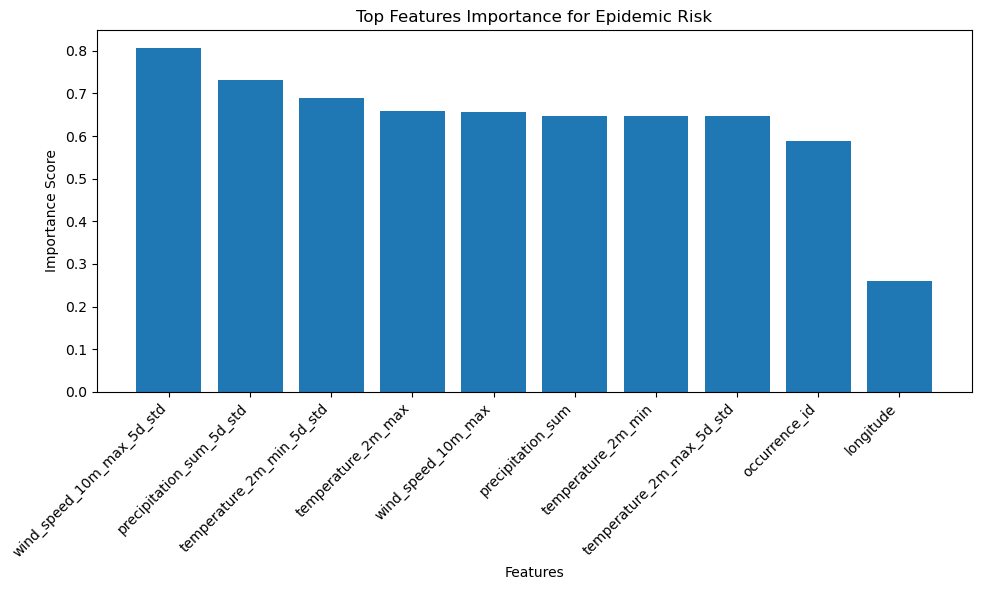

In [13]:
top_features = risk.feature_importances['top_features']

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(top_features.keys(), top_features.values())
plt.title('Top Features Importance for Epidemic Risk')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [14]:
risk_map = create_folium_risk_map(risk_df)
risk_map

In [14]:
# Create visualizations
risk_choropleth = create_interactive_risk_choropleth(risk_df)
risk_choropleth